In [20]:
# Étape 1 : Chargement des bibliothèques et des données
# Chargement des feuilles Excel
# Étape 2 : Aperçu des données
import pandas as pd
file_path = "ventes_cigarettes_modifie.xlsx"
df_ventes = pd.read_excel(file_path, sheet_name='Ventes')
df_objectifs = pd.read_excel(file_path, sheet_name='Objectifs')
df_ventes.head()
df_objectifs.head()

,Région,Canal,Objectif_mensuel
0,Centre,Boutique,27226
1,Centre,En ligne,40022
2,Centre,Revendeur,72960
3,Est,Boutique,36285
4,Est,En ligne,45903


In [21]:
# Dimension de la table ventes
df_ventes.shape

(120, 8)

In [22]:
# Dimension de la table objectifs
df_objectifs.shape

(15, 3)

In [23]:
# Nettoyage des données
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_vente          120 non-null    int64  
 1   Date              120 non-null    object 
 2   Région            120 non-null    object 
 3   Canal             120 non-null    object 
 4   Produit           120 non-null    object 
 5   Quantité_vendue   120 non-null    int64  
 6   Prix_unitaire     120 non-null    float64
 7   Chiffre_affaires  120 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ KB


In [15]:
df_objectifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Région            15 non-null     object
 1   Canal             15 non-null     object
 2   Objectif_mensuel  15 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 492.0+ bytes


In [25]:
# Verifier les null
df_ventes.isnull().sum()

ID_vente            0
Date                0
Région              0
Canal               0
Produit             0
Quantité_vendue     0
Prix_unitaire       0
Chiffre_affaires    0
dtype: int64

In [26]:
# Verifier les doublons
df_ventes.duplicated().sum()

0

In [27]:
# Transformation des types et ajout de colonnes 'Année' et ' Mois'
df_ventes['Date'] = pd.to_datetime(df_ventes['Date'])
df_ventes['Année'] = df_ventes['Date'].dt.year
df_ventes['Mois'] = df_ventes['Date'].dt.month
df_ventes.head()

,ID_vente,Date,Région,Canal,Produit,Quantité_vendue,Prix_unitaire,Chiffre_affaires,Année,Mois
0,1,2024-07-01,Sud,Revendeur,Cigarette C,335,5.11,1711.85,2024,7
1,2,2024-01-01,Centre,Revendeur,Cigarette B,63,1.67,105.21,2024,1
2,3,2024-01-01,Est,En ligne,Cigarette B,19,4.33,82.27,2024,1
3,4,2024-09-01,Ouest,Revendeur,Cigarette A,414,2.74,1134.36,2024,9
4,5,2024-01-01,Ouest,En ligne,Cigarette A,451,3.11,1402.61,2024,1


In [49]:
# Calculs statistiques
# Chiffre d'affaires par région
ca_par_region = df_ventes.groupby('Région')['Chiffre_affaires'].sum().reset_index()
print(ca_par_region)
# Regions les plus rentables
Region_rentable = df_ventes.groupby('Région')['Chiffre_affaires'].sum().sort_values(ascending=False)
print(Region_rentable.head(2))

   Région  Chiffre_affaires
0  Centre          17742.29
1     Est          22591.49
2    Nord          21531.17
3   Ouest          30794.11
4     Sud          15953.53
Région
Ouest    30794.11
Est      22591.49
Name: Chiffre_affaires, dtype: float64


In [51]:
# Chiffre d'affaires par canal
ca_par_canal = df_ventes.groupby('Canal')['Chiffre_affaires'].sum().reset_index()
print(ca_par_canal)
# Canal le plus rentable
canal_rentable = df_ventes.groupby('Canal')['Chiffre_affaires'].sum().sort_values(ascending=False)
print(canal_rentable.head(1))

       Canal  Chiffre_affaires
0   Boutique          20943.29
1   En ligne          39490.82
2  Revendeur          48178.48
Canal
Revendeur    48178.48
Name: Chiffre_affaires, dtype: float64


In [34]:
# Moyenne des ventes par mois et region
moy_ventes = df_ventes.groupby(['Mois', 'Région'])['Chiffre_affaires'].mean().reset_index()
print(moy_ventes.head())


   Mois  Région  Chiffre_affaires
0     1  Centre        287.205000
1     1     Est        801.946667
2     1   Ouest        997.191429
3     1     Sud         46.560000
4     2  Centre        878.970000


In [36]:
# Cigarette la plus vendus
Cigarette_plus_vendus = df_ventes.groupby("Produit")["Quantité_vendue"].sum().sort_values(ascending=False)
print(Cigarette_plus_vendus)

Produit
Cigarette C    12502
Cigarette A     9778
Cigarette B     9241
Name: Quantité_vendue, dtype: int64


In [59]:
# Combien de cigarette sont vendus par region
ventes_par_region_produit = df_ventes.groupby(['Région', 'Produit'])['Quantité_vendue'].sum().reset_index()
print(ventes_par_region_produit)


    Région      Produit  Quantité_vendue
0   Centre  Cigarette A             1161
1   Centre  Cigarette B             1859
2   Centre  Cigarette C             2070
3      Est  Cigarette A             2282
4      Est  Cigarette B             2002
5      Est  Cigarette C             2430
6     Nord  Cigarette A             1291
7     Nord  Cigarette B             2817
8     Nord  Cigarette C             2160
9    Ouest  Cigarette A             3839
10   Ouest  Cigarette B              863
11   Ouest  Cigarette C             4216
12     Sud  Cigarette A             1205
13     Sud  Cigarette B             1700
14     Sud  Cigarette C             1626


In [62]:
# La cigarette la plus vendue par region
idx_max = ventes_par_region_produit.groupby('Région')['Quantité_vendue'].idxmax()
top_cigarette_par_region = ventes_par_region_produit.loc[idx_max].reset_index(drop=True)

print(top_cigarette_par_region)

   Région      Produit  Quantité_vendue
0  Centre  Cigarette C             2070
1     Est  Cigarette C             2430
2    Nord  Cigarette B             2817
3   Ouest  Cigarette C             4216
4     Sud  Cigarette B             1700


In [70]:
# Fusion de deux tables (ventes et objectifs)
fusion = df_ventes.groupby(['Région', 'Canal'])['Chiffre_affaires'].sum().reset_index()
fusion = fusion.merge(df_objectifs, on=['Région', 'Canal'], how='left')
print(fusion)


    Région      Canal  Chiffre_affaires  Objectif_mensuel
0   Centre   Boutique           5005.16             27226
1   Centre   En ligne           3744.68             40022
2   Centre  Revendeur           8992.45             72960
3      Est   Boutique           6170.35             36285
4      Est   En ligne           7337.59             45903
5      Est  Revendeur           9083.55             64807
6     Nord   Boutique           4602.07             38008
7     Nord   En ligne           6735.88             48334
8     Nord  Revendeur          10193.22             54406
9    Ouest   Boutique           2238.17             41815
10   Ouest   En ligne          15552.26             44922
11   Ouest  Revendeur          13003.68             55869
12     Sud   Boutique           2927.54             38670
13     Sud   En ligne           6120.41             47325
14     Sud  Revendeur           6905.58             65575


In [71]:
fusion['Écart_vs_objectif'] = fusion['Chiffre_affaires'] - fusion['Objectif_mensuel']
fusion['Atteint_objectif'] = fusion['Écart_vs_objectif'] >= 0
print(fusion)

    Région      Canal  Chiffre_affaires  Objectif_mensuel  Écart_vs_objectif  \
0   Centre   Boutique           5005.16             27226          -22220.84   
1   Centre   En ligne           3744.68             40022          -36277.32   
2   Centre  Revendeur           8992.45             72960          -63967.55   
3      Est   Boutique           6170.35             36285          -30114.65   
4      Est   En ligne           7337.59             45903          -38565.41   
5      Est  Revendeur           9083.55             64807          -55723.45   
6     Nord   Boutique           4602.07             38008          -33405.93   
7     Nord   En ligne           6735.88             48334          -41598.12   
8     Nord  Revendeur          10193.22             54406          -44212.78   
9    Ouest   Boutique           2238.17             41815          -39576.83   
10   Ouest   En ligne          15552.26             44922          -29369.74   
11   Ouest  Revendeur          13003.68 

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

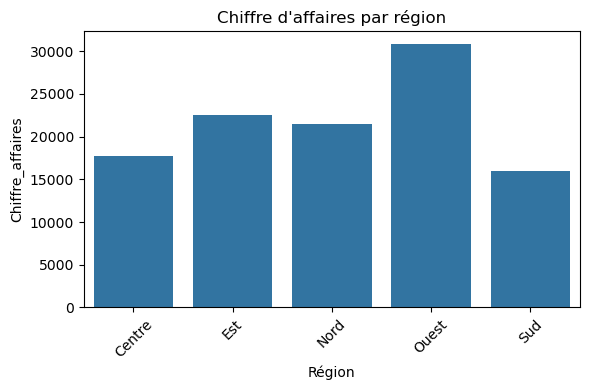

In [97]:
# Chiffre d'affaires par region
plt.figure(figsize=(6, 4))
sns.barplot(data=ca_par_region, x='Région', y='Chiffre_affaires')
plt.title('Chiffre d\'affaires par région')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

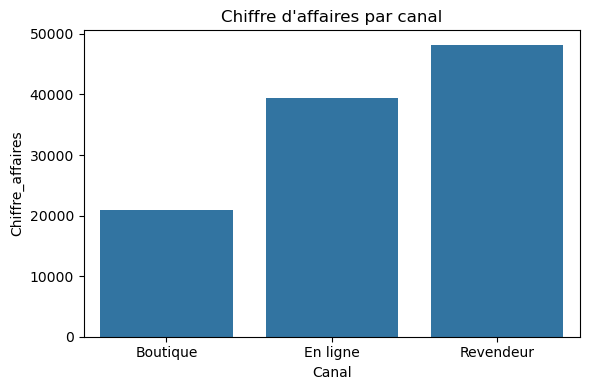

In [98]:
# Chiffre d'affaire par canal
plt.figure(figsize=(6, 4))
sns.barplot(data=ca_par_canal, x='Canal', y='Chiffre_affaires')
plt.title('Chiffre d\'affaires par canal')
plt.tight_layout()
plt.show()

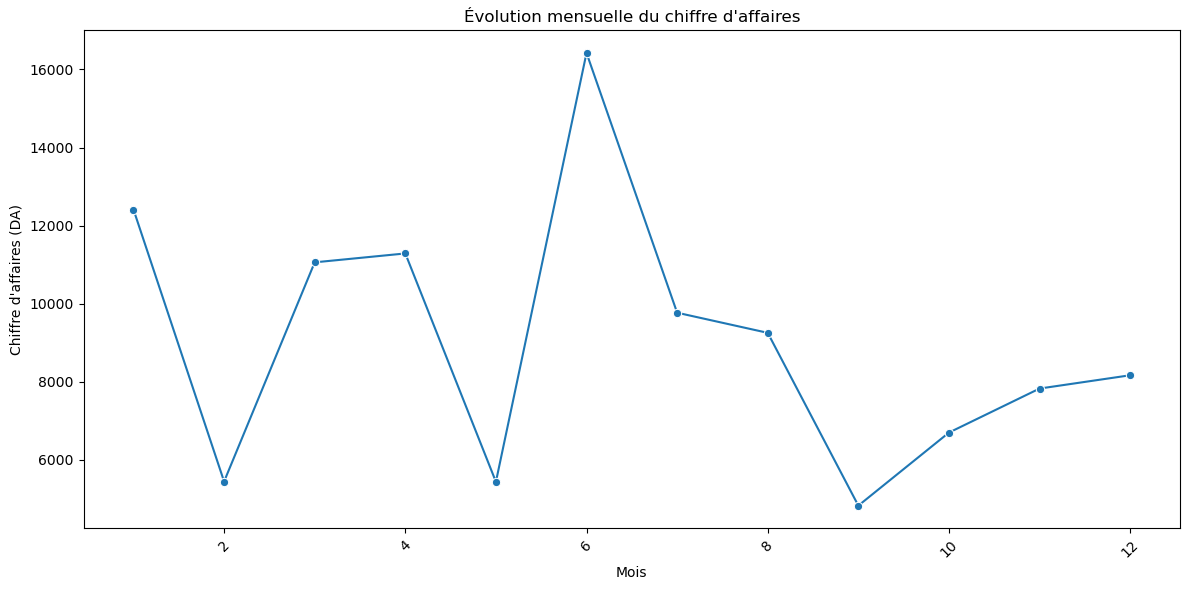

In [99]:
# Evolution mensuelle du chiffre d'affaires
evo_mensuelle = df_ventes.groupby(['Mois'])['Chiffre_affaires'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=evo_mensuelle, x='Mois', y='Chiffre_affaires', marker='o')
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.ylabel("Chiffre d'affaires (DA)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


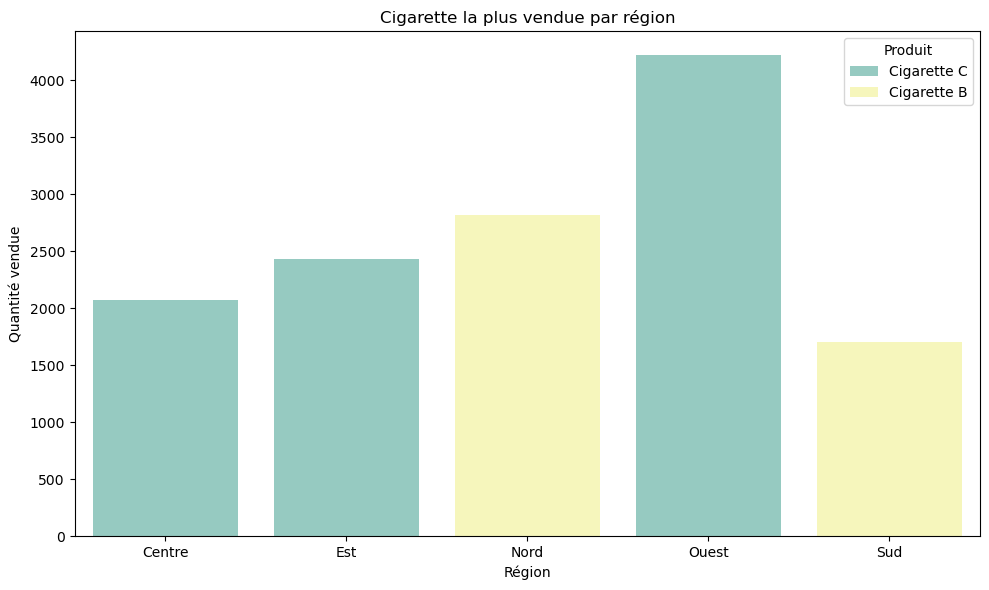

In [100]:
# Cigarette la plus vendue par région
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cigarette_par_region, x='Région', y='Quantité_vendue', hue='Produit', palette='Set3')
plt.title("Cigarette la plus vendue par région")
plt.ylabel("Quantité vendue")
plt.tight_layout()
plt.show()


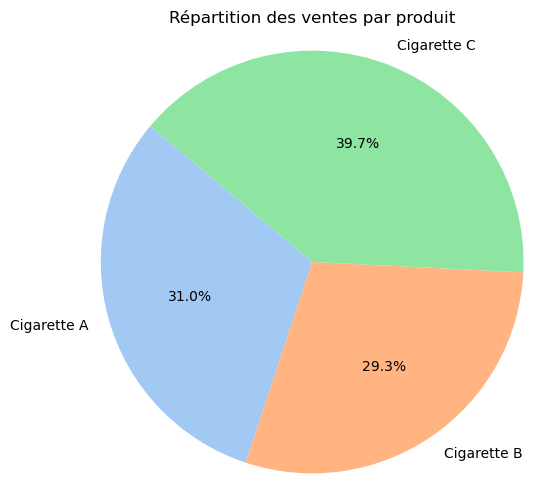

In [101]:
# Répartition des ventes par produit 
ventes_par_produit = df_ventes.groupby('Produit')['Quantité_vendue'].sum()

plt.figure(figsize=(6, 6))
plt.pie(ventes_par_produit, labels=ventes_par_produit.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Répartition des ventes par produit")
plt.axis('equal')
plt.show()


In [86]:
!pip install plotly


In [87]:
import plotly.express as px

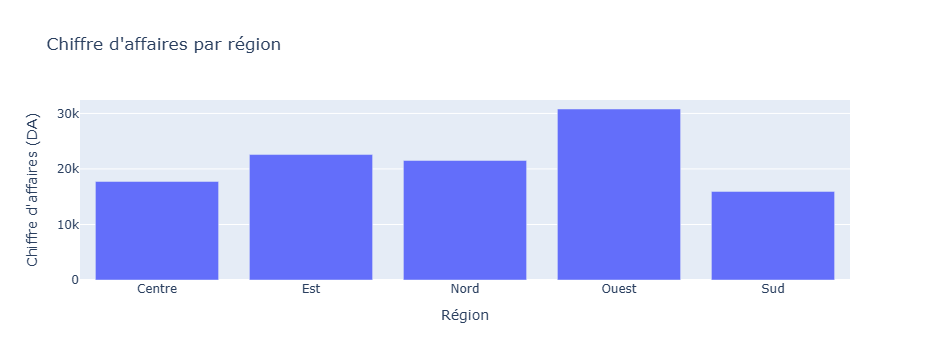

In [93]:
#Chiffre d’affaires par région
fig = px.bar(ca_par_region, x='Région', y='Chiffre_affaires',
             title="Chiffre d'affaires par région",
             labels={'Chiffre_affaires': 'Chiffre d\'affaires (DA)'})
fig.show()


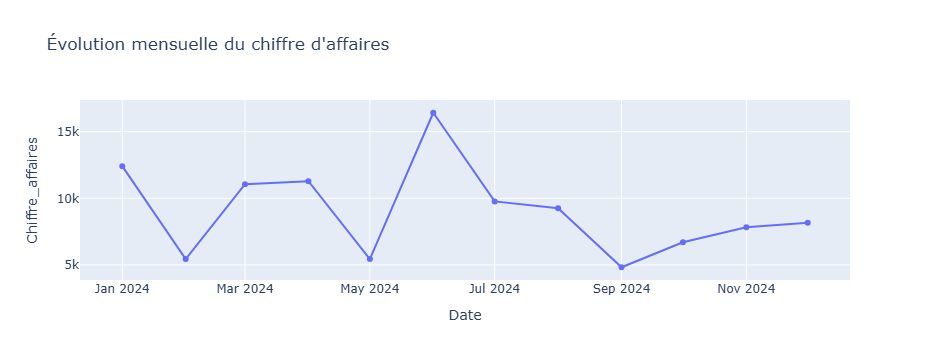

In [95]:
# Évolution mensuelle du chiffre d’affaires
evo_mensuelle = df_ventes.groupby('Date')['Chiffre_affaires'].sum().reset_index()

fig = px.line(evo_mensuelle, x='Date', y='Chiffre_affaires',
              title="Évolution mensuelle du chiffre d'affaires",
              markers=True)
fig.show()


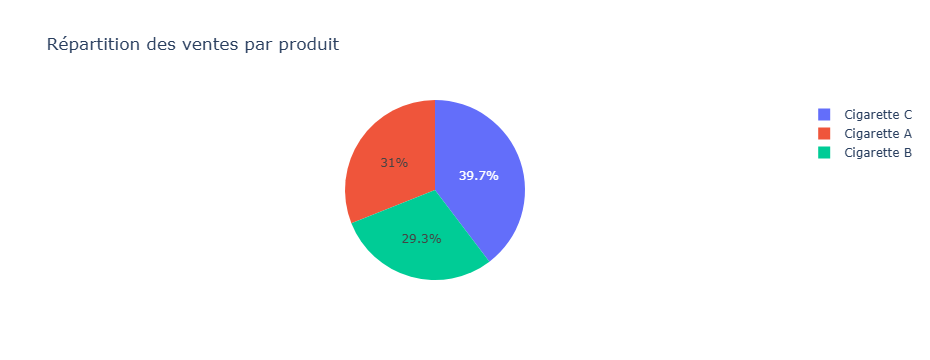

In [96]:
#Répartition des ventes par produit
ventes_par_produit = df_ventes.groupby('Produit')['Quantité_vendue'].sum().reset_index()

fig = px.pie(ventes_par_produit, names='Produit', values='Quantité_vendue',
             title="Répartition des ventes par produit")
fig.show()


In [92]:
fusion.to_excel("résultats_fusion_objectifs.xlsx", index=False)
print("Analyse terminée.")

Analyse terminée.
